In [1]:
# Loading the Dataset
df=pd.read_csv(r"C:\Users\91987\Desktop\Flip Robo\Micro-Credit-Project\Micro Credit Project/Data file.csv")

<IPython.core.display.Javascript object>

In [2]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

### Exploring DataSet

In [3]:
# Checking the variables of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

__We can see that there are three features which are of Object type and would not be accepted by model.__
__So we need to treat them before model building.__

1. msisdn
2. pcircle
3. pdate

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64


<IPython.core.display.Javascript object>

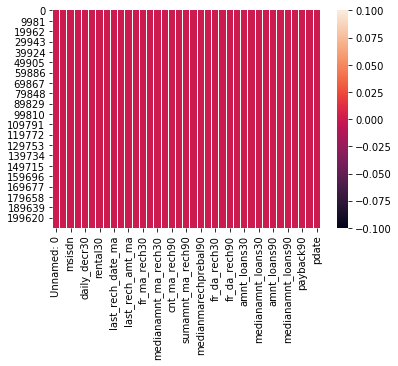

In [4]:
# Checking for the null Values.
print(df.isnull().sum())


#Visualising null values.

sns.heatmap(df.isnull())

__As we can see that there are no null values in the DataSet so we do not have to worry about the missing values.__

In [5]:
# Desscribing the dataset
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

In [6]:
# Checking shape of Dataset
df.shape


(209593, 37)

In [7]:
# Exploring the features in Dataset 
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

__As we can see that the first column doesnt have any name it is just being used for indexing. i.e. it won't help in model building.
So we can drop it.__

In [8]:
# Dropping first column

df.drop(df.columns[[0]],axis=1,inplace=True)

In [9]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 36 columns]

__Now we will be handling our object type Features.__

1. msisdn

In [10]:
#df[['msisdn']].info()

df.msisdn.nunique() 

186243

In [11]:
for i in df['msisdn']:
    print(i)

21408I70789
76462I70374
17943I70372
55773I70781
03813I82730
35819I70783
96759I84459
09832I90846
59772I84450
56331I70783
32893I82732
82417I90848
11435I89236
66580I97601
63139I70377
24075I89239
82053I85350
37204I84452
44217I90455
19611I90842
67813I90589
75522I70784
61590I95202
95027I90841
59645I82735
59102I70370
44692I90581
49345I90842
64703I85330
12658I88689
70130I90843
37891I90581
78260I85349
75630I88698
51478I70375
42449I82734
41249I82731
01210I90840
11418I90845
26411I70786
28150I82731
85580I70784
62149I84450
27123I95200
82895I85329
04140I90843
23884I90845
32783I90843
03746I91197
55570I82737
99293I70785
02367I91190
02534I84456
09561I70374
53152I70789
93567I90843
63277I70786
28146I70780
81496I84451
06969I98087
42023I90584
60754I89235
82828I89230
03894I88648
30220I82737
63268I91197
74769I70786
49949I89234
81127I90840
94373I82733
31077I82733
83861I90586
41026I70787
83435I90849
81561I84453
71277I70373
30687I90848
98388I70377
27460I90847
23396I82731
06164I82730
71528I89238
80866I70789
4744

__"msisdn" is the feature represents Mobile no. of the users.__

__And we can see that in every observation of this feature there is a pattern which is there is an Alphabet "I" after and before every 5 digit. So I am handling this categorical feature by removing that letter I which is making it of object type.__ 

In [12]:
# check=df['msisdn'][0].replace("I","")
# check

In [13]:
# lb=[]
# for i in range(len(df['msisdn'])):
#     d=df['msisdn'][i].replace("I","")
#     lb.append(d)

In [14]:
# df['new_msisdn']=lb

In [12]:
df['msisdn_new'] = df['msisdn'].str.replace('I','')

In [13]:
df['msisdn_new']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn_new, Length: 209593, dtype: object

In [14]:
df.shape

(209593, 37)

In [15]:
# Checking our columns datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [16]:
# Converting our newly created column "msisdn_new" to float type

df['msisdn_new']=df['msisdn_new'].astype(float) 
df['msisdn_new'].dtype

dtype('float64')

And now we can drop our old column "msisdn" which was of object type as we have created a new feature of float type inplace of that which will be acceptable by our model.

In [17]:
# Dropping initial Mobile no. column which is of object data type.

df.drop(['msisdn'],axis=1,inplace=True)

In [18]:
df.shape

(209593, 36)

In [19]:
# Checking our columns datatypes again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

__Treating second feature.__
2. pcircle

In [20]:
# Checking for the number of unique observations in the feature.

df['pcircle'].nunique()

1

As we can see that there is only one value in all the observations of the feature so we can drop this feature as it won't make any impact on the prediction.

In [21]:
# Dropping feature representing Telecom Circle as it has only single value in entire column.

df.drop(['pcircle'],axis=1,inplace=True)

In [22]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90       pdate  \
0                6                 0.0  29.000000  29.000000  2016-07-20   
1               12                 0.0   0.000000   0.000000  2016-08-10   
2                6                 0.0   0.000000   0.000000  2016-08-19   
3                6                 0.0   0.000000   0.000000  2016-06-06   
4                6                 0.0   2.333333   2.333333  2016-06-22   

     msisdn_new  
0  2.140871e+09  
1  7.646270e+09  
2  1.794370e+09  
3  5.577371e+09  
4  3.813827e+08  

[5 rows x 35 columns]

__Now we have only one object type column "pdate".__

In [23]:
# Segregating date column into date , month and year column seperately.

df['date']=pd.to_datetime(df.pdate).dt.day
df['month']=pd.to_datetime(df.pdate).dt.month
df['year']=pd.to_datetime(df.pdate).dt.year

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Checking Date
df['date']

0         20
1         10
2         19
3          6
4         22
          ..
209588    17
209589    12
209590    29
209591    25
209592     7
Name: date, Length: 209593, dtype: int64

In [25]:
# Checking Month

df['month']

0         7
1         8
2         8
3         6
4         6
         ..
209588    6
209589    6
209590    7
209591    7
209592    7
Name: month, Length: 209593, dtype: int64

In [26]:
# Checking Year

df['year'].unique()


# We have seen that all the observation has same year i.e. 2016 so we don't need this column as it won't make any impact on prediction.
# So we won't be using year column.

array([2016], dtype=int64)

Dropping column "pdate" and "year" from dataset.

In [27]:
df.drop(['pdate'],axis=1,inplace=True)

In [28]:
df.drop(['year'],axis=1,inplace=True)

In [29]:
df.shape

(209593, 36)

In [30]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'msisdn_new', 'date', 'month'],
      dtype='object')

__ __

__Now we have handle all our categorical column and now we will try to find out the relation among different features of the dataset.__

__ __

In [31]:
# Chekcing data type of features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [31]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
msisdn_new            0.001945  0.000555      0.000669      0.000903   
date                  0.006825  0.000662      0.006477     -0.021508   
month                 0.154949 -0.001863      0.518664      0.539410   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

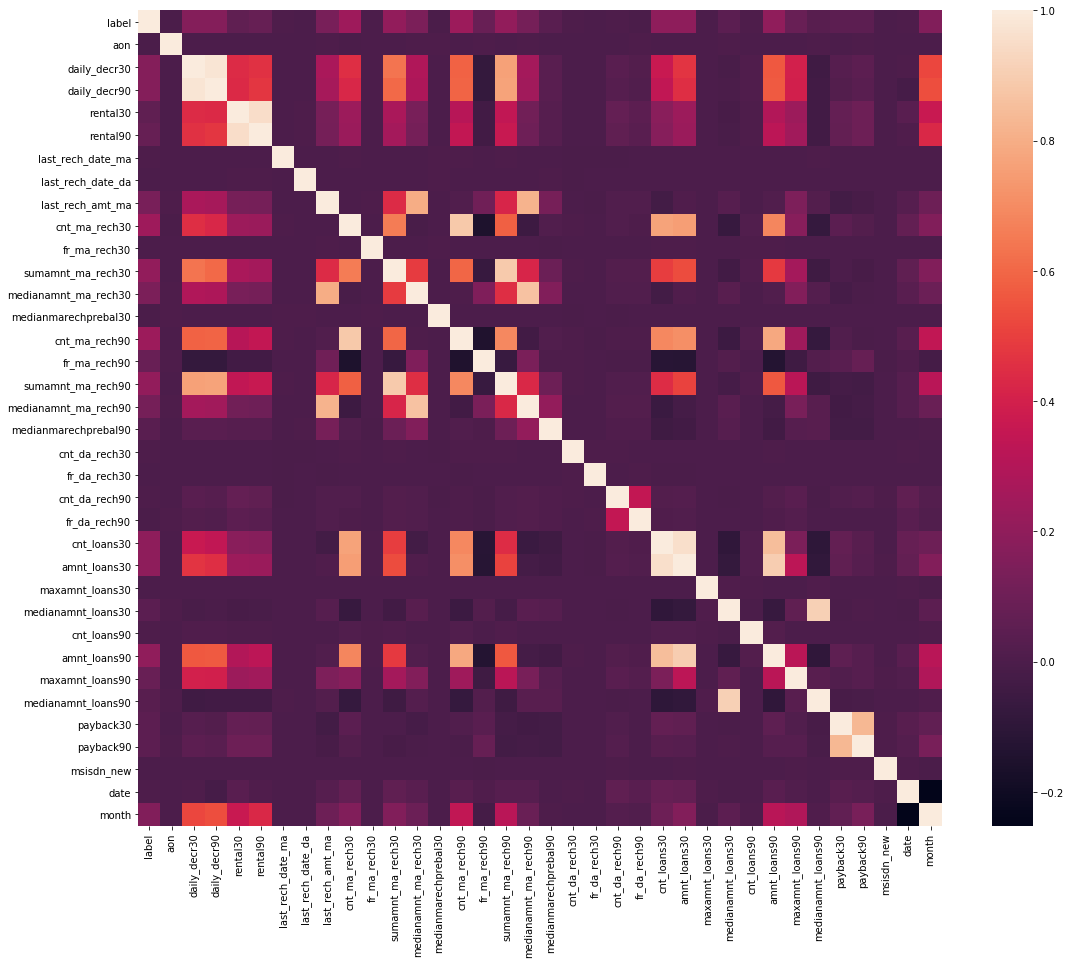

In [32]:
# Visualising the correlation using heatmap.

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=False)
plt.show()

__From the above heatmap and the correraltion calculated among the features we can see that there are some features which have very less impact on our target varaible label, So we can drop those features__

_Example_

1. fr_ma_rech30
2. fr_da_rech30
3. maxamnt_loans30
4. msisdn (this feature also have distinct value for almost all the observations in the feature as It represents mobile no. of                the users So I am also dropping this.)

In [32]:
# Dropping all the features which are having almost no impact on the target variable.

df.drop(['fr_ma_rech30','fr_da_rech30','maxamnt_loans30','msisdn_new'],axis=1,inplace=True)

In [33]:
# Checking shape of newly form dataset
df.shape

(209593, 32)

__Now I will check for Outliers.__

<IPython.core.display.Javascript object>

Variable is - label


<IPython.core.display.Javascript object>

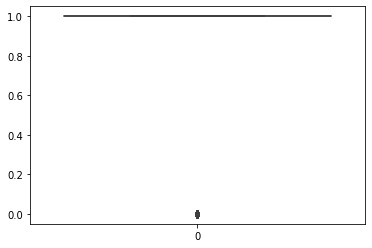

<IPython.core.display.Javascript object>

Variable is - aon


<IPython.core.display.Javascript object>

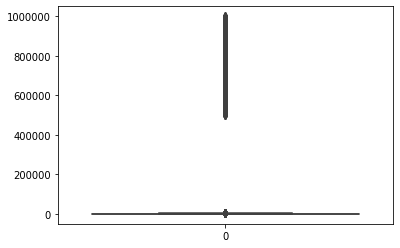

<IPython.core.display.Javascript object>

Variable is - daily_decr30


<IPython.core.display.Javascript object>

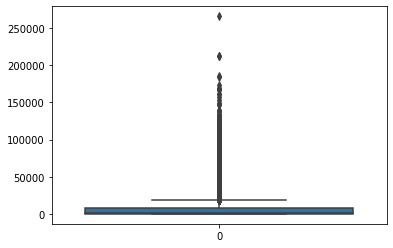

<IPython.core.display.Javascript object>

Variable is - daily_decr90


<IPython.core.display.Javascript object>

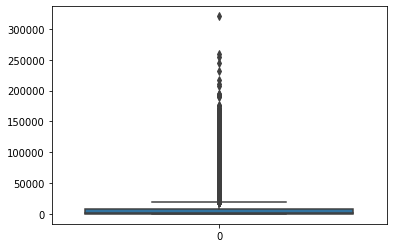

<IPython.core.display.Javascript object>

Variable is - rental30


<IPython.core.display.Javascript object>

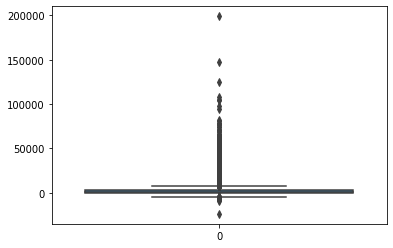

<IPython.core.display.Javascript object>

Variable is - rental90


<IPython.core.display.Javascript object>

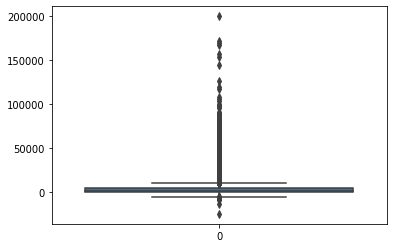

<IPython.core.display.Javascript object>

Variable is - last_rech_date_ma


<IPython.core.display.Javascript object>

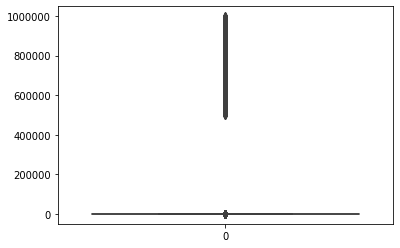

<IPython.core.display.Javascript object>

Variable is - last_rech_date_da


<IPython.core.display.Javascript object>

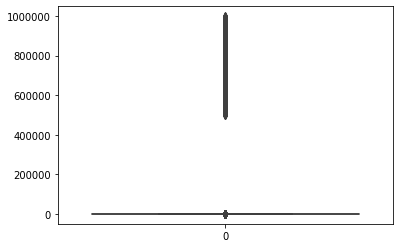

<IPython.core.display.Javascript object>

Variable is - last_rech_amt_ma


<IPython.core.display.Javascript object>

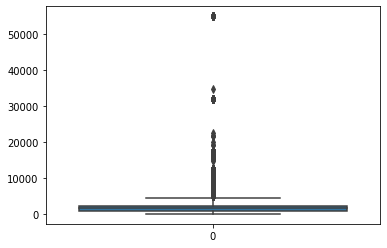

<IPython.core.display.Javascript object>

Variable is - cnt_ma_rech30


<IPython.core.display.Javascript object>

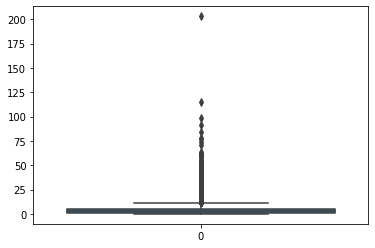

<IPython.core.display.Javascript object>

Variable is - sumamnt_ma_rech30


<IPython.core.display.Javascript object>

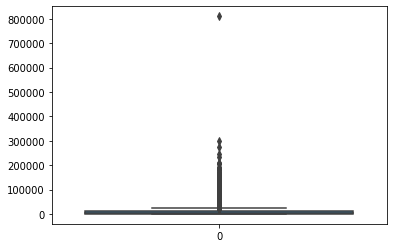

<IPython.core.display.Javascript object>

Variable is - medianamnt_ma_rech30


<IPython.core.display.Javascript object>

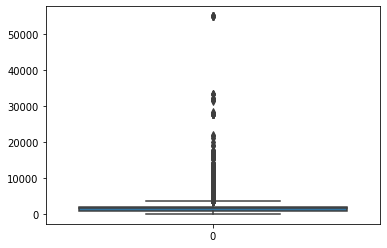

<IPython.core.display.Javascript object>

Variable is - medianmarechprebal30


<IPython.core.display.Javascript object>

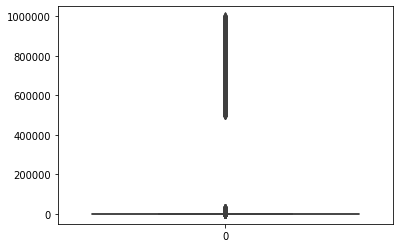

<IPython.core.display.Javascript object>

Variable is - cnt_ma_rech90


<IPython.core.display.Javascript object>

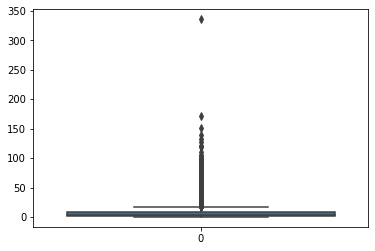

<IPython.core.display.Javascript object>

Variable is - fr_ma_rech90


<IPython.core.display.Javascript object>

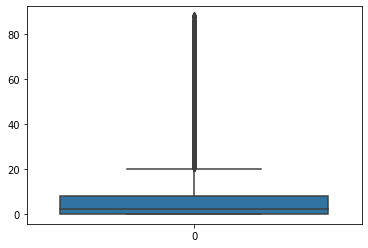

<IPython.core.display.Javascript object>

Variable is - sumamnt_ma_rech90


<IPython.core.display.Javascript object>

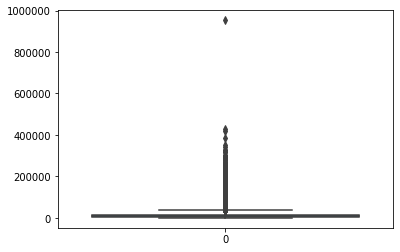

<IPython.core.display.Javascript object>

Variable is - medianamnt_ma_rech90


<IPython.core.display.Javascript object>

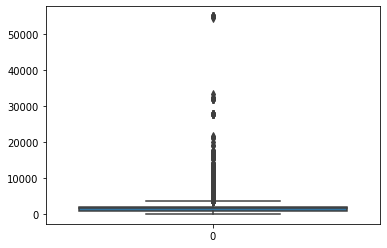

<IPython.core.display.Javascript object>

Variable is - medianmarechprebal90


<IPython.core.display.Javascript object>

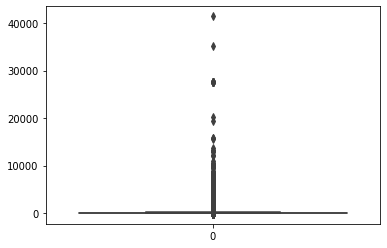

<IPython.core.display.Javascript object>

Variable is - cnt_da_rech30


<IPython.core.display.Javascript object>

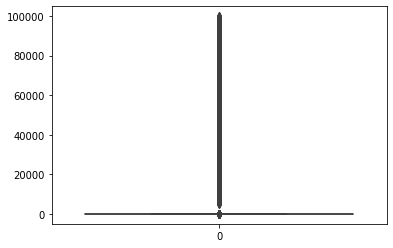

<IPython.core.display.Javascript object>

Variable is - cnt_da_rech90


<IPython.core.display.Javascript object>

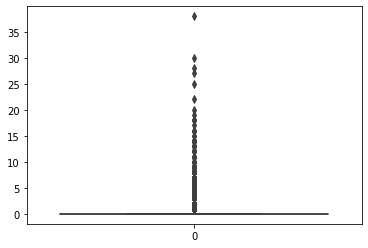

<IPython.core.display.Javascript object>

Variable is - fr_da_rech90


<IPython.core.display.Javascript object>

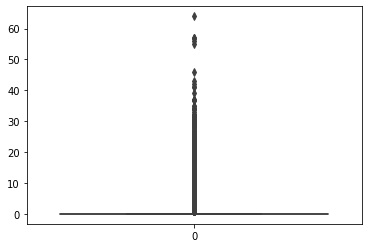

<IPython.core.display.Javascript object>

Variable is - cnt_loans30


<IPython.core.display.Javascript object>

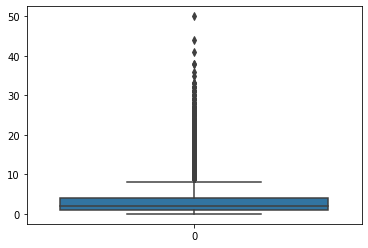

<IPython.core.display.Javascript object>

Variable is - amnt_loans30


<IPython.core.display.Javascript object>

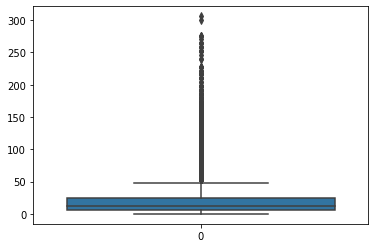

<IPython.core.display.Javascript object>

Variable is - medianamnt_loans30


<IPython.core.display.Javascript object>

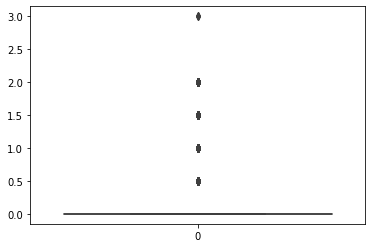

<IPython.core.display.Javascript object>

Variable is - cnt_loans90


<IPython.core.display.Javascript object>

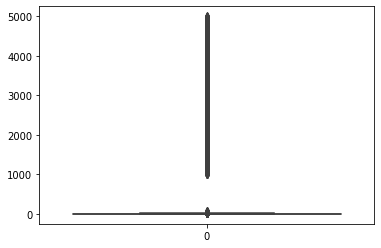

<IPython.core.display.Javascript object>

Variable is - amnt_loans90


<IPython.core.display.Javascript object>

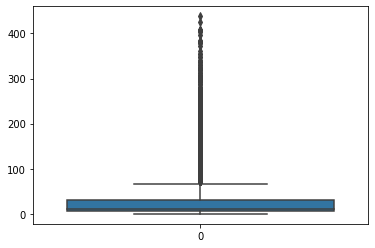

<IPython.core.display.Javascript object>

Variable is - maxamnt_loans90


<IPython.core.display.Javascript object>

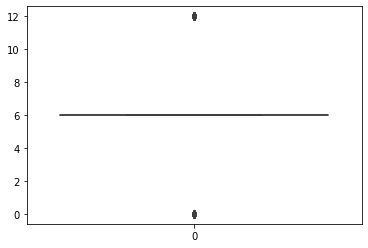

<IPython.core.display.Javascript object>

Variable is - medianamnt_loans90


<IPython.core.display.Javascript object>

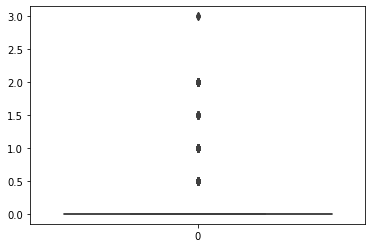

<IPython.core.display.Javascript object>

Variable is - payback30


<IPython.core.display.Javascript object>

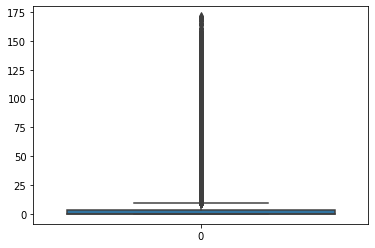

<IPython.core.display.Javascript object>

Variable is - payback90


<IPython.core.display.Javascript object>

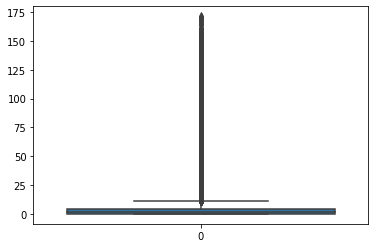

<IPython.core.display.Javascript object>

Variable is - date


<IPython.core.display.Javascript object>

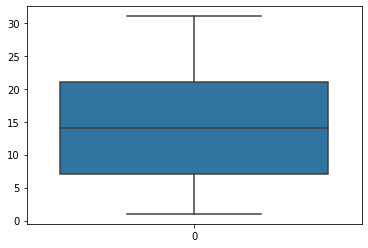

<IPython.core.display.Javascript object>

Variable is - month


<IPython.core.display.Javascript object>

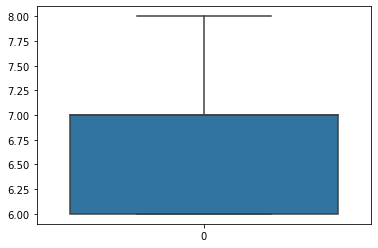

In [35]:
for i in df.columns:
    sns.boxplot(data=df[i])
    #df[i].plot.box()
    print("Variable is -",i)
    plt.show()
    #print(df[i])

_As we can see that there are many featurs having outliers present in them which needs to be treated._

__ __

__Taking out the target variable from data set and then checking for skewness in the dataset.__


In [34]:
x=df.drop("label",axis=1)

In [35]:
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  ...  \
0                0.0              1539              2             3078.0  ...   
1                0.0              5787              1             5787.0  ...   
2                0.0              1539              1             1539.0  ...   
3                0.0               947              0                0.0  ...   
4                0.0              2309              7            20029.0  ...   

   amnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0            12                 0.0          2.0            12   
1            12                 0.0          1.0            12   
2             6                 0.0          1.0             6   
3            12                 0.0          2.0            12   
4            42                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  date  month  
0                6                 0.0  29.000000  29.000000    20      7  
1               12                 0.0   0.000000   0.000000    10      8  
2                6                 0.0   0.000000   0.000000    19      8  
3                6                 0.0   0.000000   0.000000     6      6  
4                6                 0.0   2.333333   2.333333    22      6  

[5 rows x 31 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

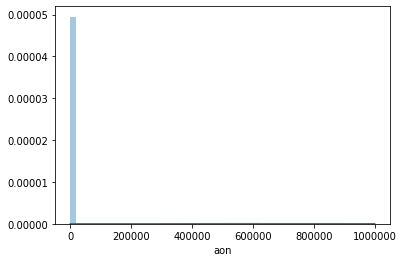

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

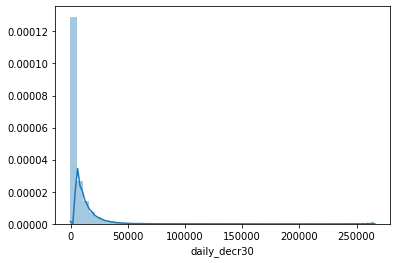

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

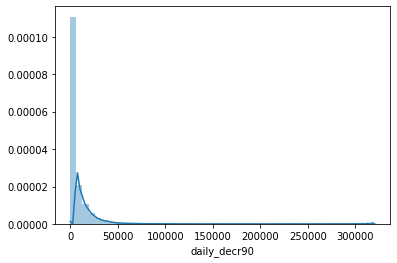

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

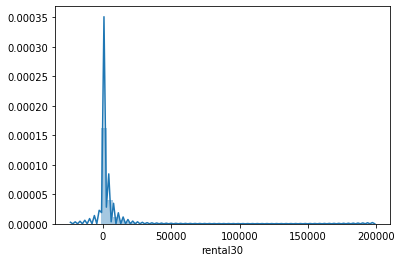

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

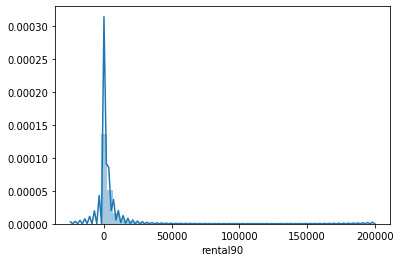

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

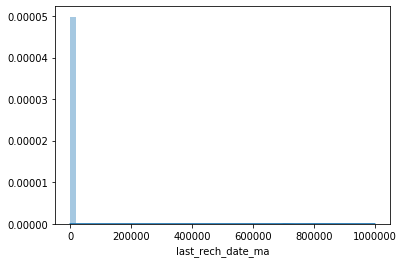

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

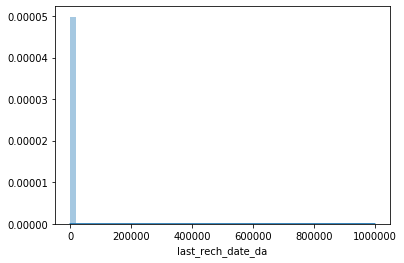

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

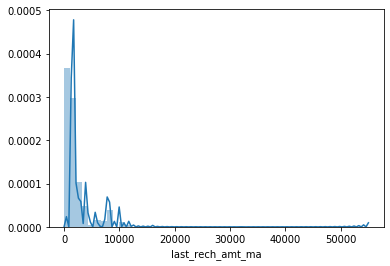

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

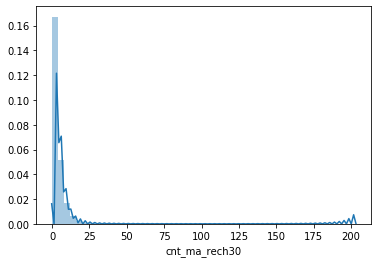

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

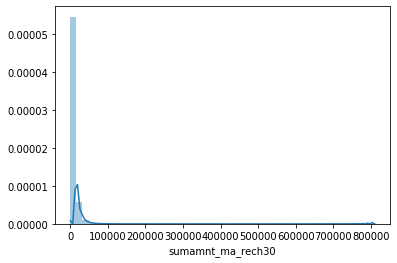

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

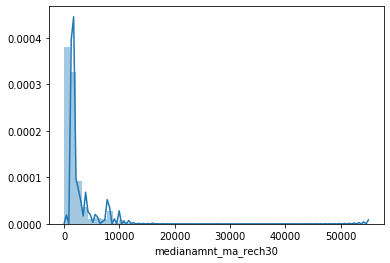

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

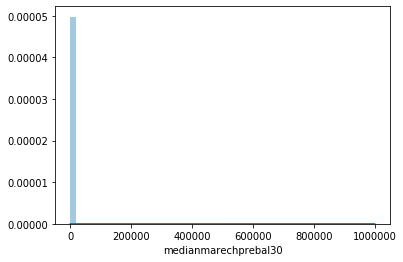

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

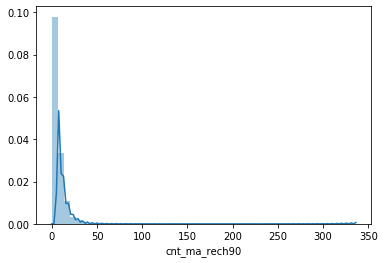

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

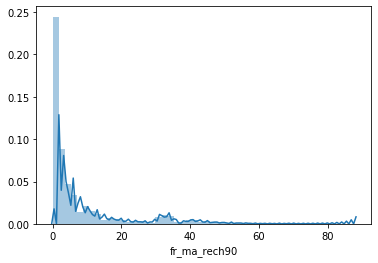

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

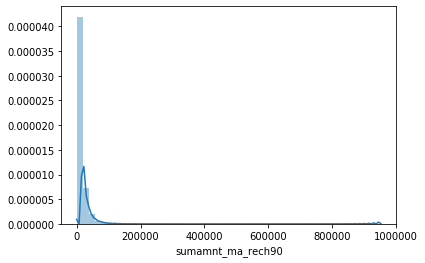

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

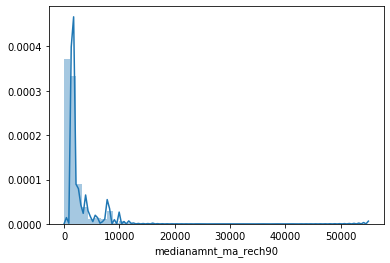

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

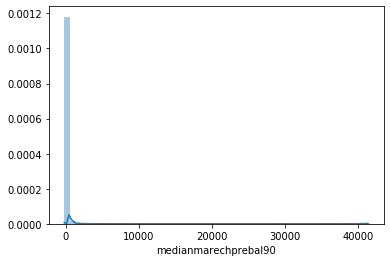

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

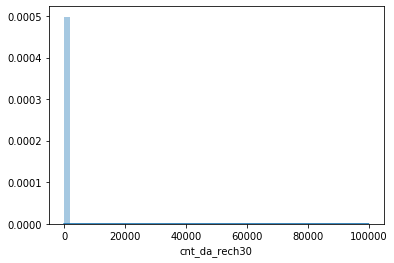

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

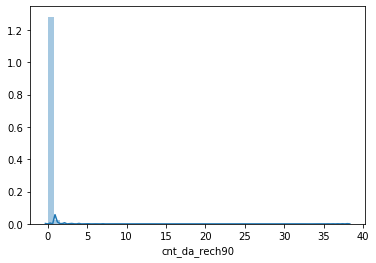

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

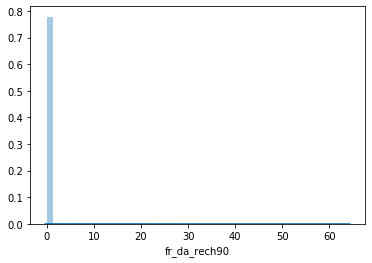

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

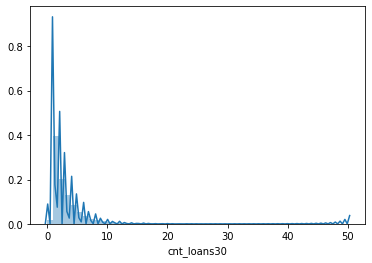

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

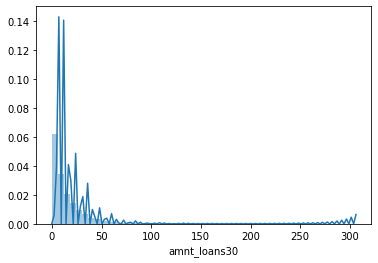

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

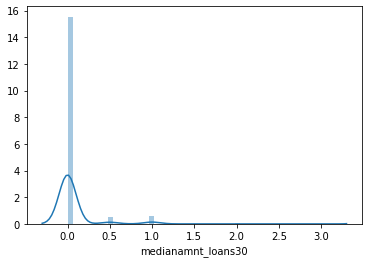

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

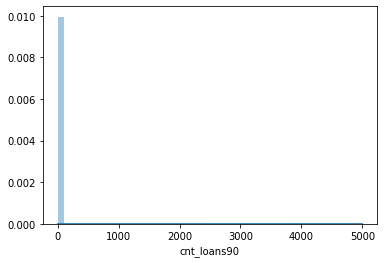

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

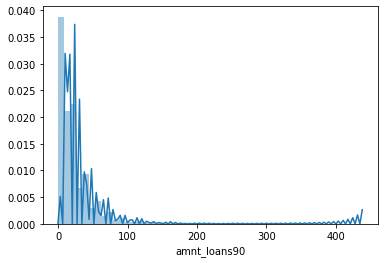

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

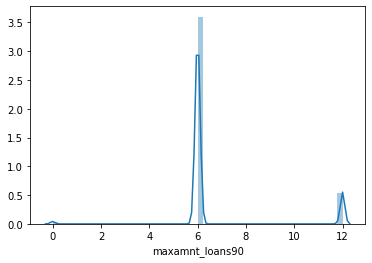

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

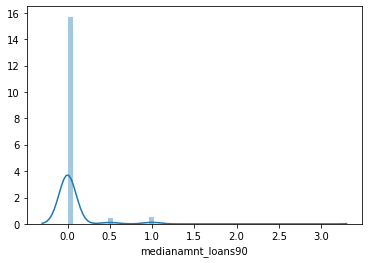

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

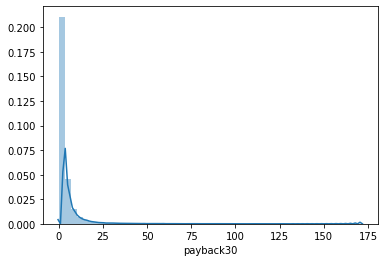

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

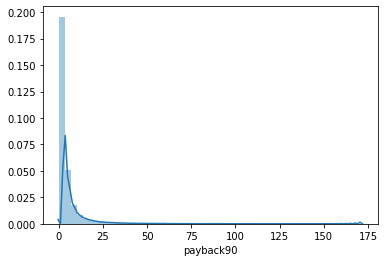

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

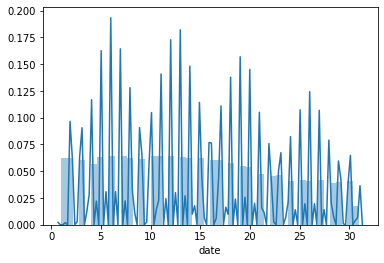

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

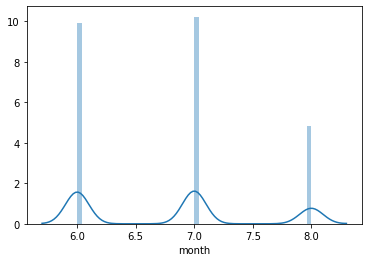

In [38]:
# Visualising the distribution and skewness in features.

for i in x.columns:
    sns.distplot(x[i], kde_kws={'bw':0.1})
    plt.show()
    #print(i)

In [39]:
#x.info()

In [39]:
# Checkimg Skewness

x.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90                6.899951
date          

__As we can see that there is skewness in allmost all the features of our dataset which needs to be treated.__

## Checking the percentage of Data Fall Under Outliers

### 1 Way Through Zscore

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([13, 13, 28, ..., 24, 22, 26], dtype=int64))

In [41]:
df_new=x[(z<3).all(axis=1)]

In [42]:
df_new

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228333  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        sumamnt_ma_rech30  ...  amnt_loans30  medianamnt_loans30  cnt_loans90  \
0                  3078.0  ...            12                 0.0          2.0   
1                  5787.0  ...            12                 0.0          1.0   
2                  1539.0  ...             6                 0.0          1.0   
3                     0.0  ...            12                 0.0          2.0   
4                 20029.0  ...            42                 0.0          7.0   
...                   ...  ...           ...                 ...          ...   
209588            10404.0  ...            12                 0.0          2.0   
209589             3092.0  ...            18                 0.0          3.0   
209590             9334.0  ...            42                 0.0          6.0   
209591            12154.0  ...            18                 0.0          3.0   
209592             9065.0  ...            18                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90  date  month  
0       29.000000    20      7  
1        0.000000    10      8  
2        0.000000    19      8  
3        0.000000     6      6  
4        2.333333    22      6  
...           ...   ...    ...  
209588   1.000000    17      6  
209589   1.000000    12      6  
209590   3.833333    29      7  
209591  10.500000    25      7  
209592   0.000000     7      7  

[163839 ro

In [43]:
x.shape

(209593, 31)

In [44]:
209593-163839

45754

In [45]:
# Percent of data lost after outlier removal

percentage_loss=(45754/209593)*100
print(percentage_loss)

21.82992752620555


__By this way our ~22% of Data will be lost which we can't afford. So we have to find some another way.__



### 2. Way Through Interquartile Range

In [46]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR= Q3-Q1
print(IQR)

aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans90             0.000
medianamnt_loans90          0.000
payback30                   3.750
payback90                   4.500
date          

In [47]:
df_new1 = x[~((x< (Q1 - 1.5* IQR)) | (x> (Q3 +1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(73604, 31)


In [48]:
# Percent of data lost after outlier removal

percentage_loss=((209593-73604)/209593)*100
print(percentage_loss)

64.88241496614869


__By this way even more of our Data will be lost which is not acceptable. So now we will try to treat the skewness using yew-jhonson.__

__ __

## Removing Skewness

In [37]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Assigning Dependent Variable

In [38]:
y=df['label']

In [39]:
y.shape

(209593,)

# Applying Algorithms

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score


In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

__Finding Out which Random State will be best for prediction.__

In [42]:
import warnings
warnings.simplefilter("ignore")

In [43]:
for i in range(0,300,2):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print("Best Suitable Random State is -",i)
        print("Training Accuracy is -",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy is -",accuracy_score(y_test,pred_test)*100)
        print("-------------------------------------------------")
    
            

Best Suitable Random State is - 280
Training Accuracy is - 88.46743686739597
Testing Accuracy is - 88.47291580521008
-------------------------------------------------


__We will be using Random State 280__

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=280,test_size=.30)

__Our Data have been split into train Test dataset and now we have to apply algorithms for prediction.__

## 1. Logistic Regression

In [56]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr.score(x_test,y_test)

0.8847291580521008

In [58]:
y_pred=lr.predict(x_test)

In [59]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5648845442382202

#### ROC

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

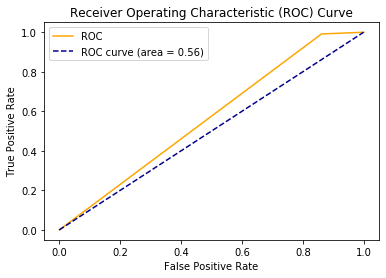

In [61]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 2. Decission Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [46]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
dt.score(x_test,y_test)

0.8835204682082763

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_param={'criterion': ['gini', 'entropy'],
     'max_depth' : range(2,32,1),
     'min_samples_leaf' : range(1,10,1),
     'min_samples_split': range(2,10,1),
     'splitter' : ['best', 'random']}

In [50]:
grid_search= GridSearchCV(dt,param_grid=grid_param,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

## I cannot fit my model on Grid Search CV I also tried doing it on Google Colab But after waiting more than 95 mins there were no results. I also raisedthe ticket for the same. SO I am skipping Hyperparameter tunning.

In [71]:
# best_param  = grid_search.best_params_
# print(best_param)

In [ ]:
# dtn= DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,min_samples_split=7,splitter='random')
# dtn.fit(x_t,y_train)

In [ ]:
# dtn.score(x_test,y_test)

In [ ]:
# y_pred_dtn=dtn.predict(x_test)

#### ROC

In [67]:
ydt_predict=dt.predict(x_test)

In [68]:
# Area Under Curve
auc = roc_auc_score(y_test, ydt_predict)
auc

0.7435633388747814

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, ydt_predict)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

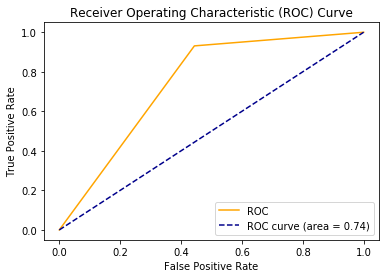

In [70]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### 3. Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=6)

In [74]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [75]:
rf.score(x_test,y_test)

0.9214192563376697

In [77]:
rf_predct=rf.predict(x_test)

#### Tried to apply Hyperparameter tunnig but wasn't able to even with the help of Google Colab.

In [ ]:
# param_grid ={'criterion': ['gini', 'entropy'],
#     'max_depth' : range(2,20,2),
#     'min_samples_split': range(2,10,1)
# }

In [ ]:
# grid_searchrf = GridSearchCV(rf,param_grid=param_grid,cv=4)

In [ ]:
# grid_searchrf.fit(x_train,y_train)
# best_param= grid_searchrf.best_params_
# print(best_param)

# rfn=RandomForestClassifier(criterion='gini',max_depth=2,min_samples_split=2)
# rfn.fit(x_t,y_train)

#### AUC ROC Curve

In [80]:
# Area Under Curve
auc = roc_auc_score(y_test, rf_predct)
auc

0.7446682338914091

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, rf_predct)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

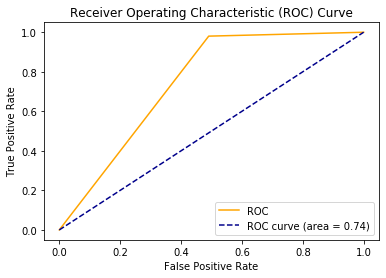

In [82]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

__After Hyperparameter tuning both the Decision Tree and Random Forest model are showing almost same Curve. We are using Random Forest as it is giving more accuracy.__

In [85]:
import pickle
with open ("MFI",'wb') as f:
    pickle.dump(rf,f)